In [9]:
from pyvisco import load
from pyvisco import shift
from pyvisco import master
from pyvisco import prony
from pyvisco import opt
from pyvisco import styles
from pyvisco import out
import pandas as pd
import numpy as np
import io
from scipy.optimize import curve_fit
import zipfile
import matplotlib.pyplot as plt
import io
import matplotlib.pyplot as plt

In [6]:
path=r"C:\Users\jamoo\Documents\05_Programming\Projects\01_Apps\Pyvisco\Pyvisco_arja\examples\freq_user_raw.csv"
data=load.file(path)
domain="freq"
modul="E"
df_raw,arr_RefT,units=load.user_raw(data,domain,modul)

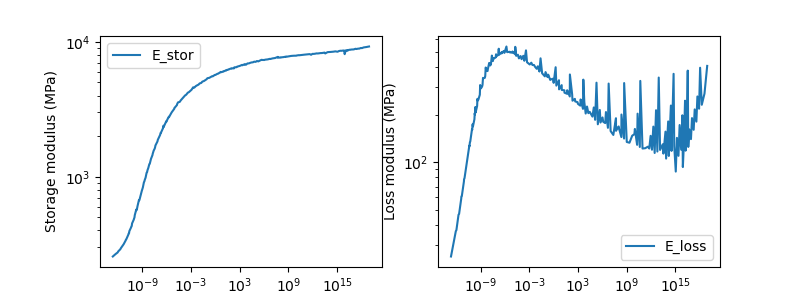

<Figure size 800x300 with 2 Axes>

In [8]:
refT=25.0
df_aT,dshift=master.get_aT(df_raw,refT)
df_master=master.get_curve(df_raw,df_aT,refT)
master.plot(df_master,units)

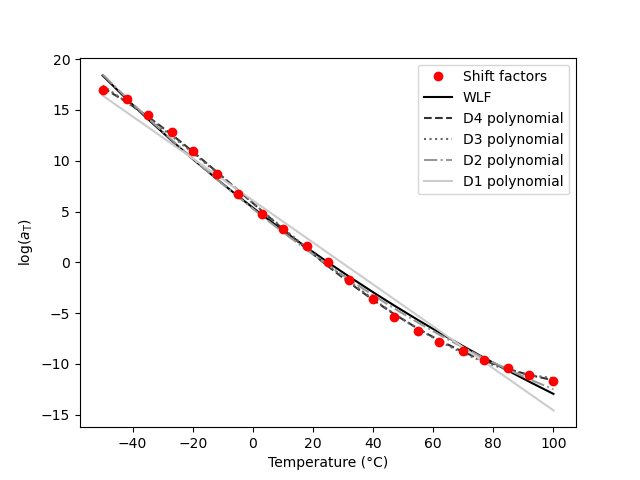

In [12]:
df_C,df_K=shift.fit_poly(df_aT)
df_WLF=shift.fit_WLF(refT,df_aT)
fig_shift,df_shift=shift.plot(df_aT,df_WLF,df_C)
#plt.show(fig_shift)

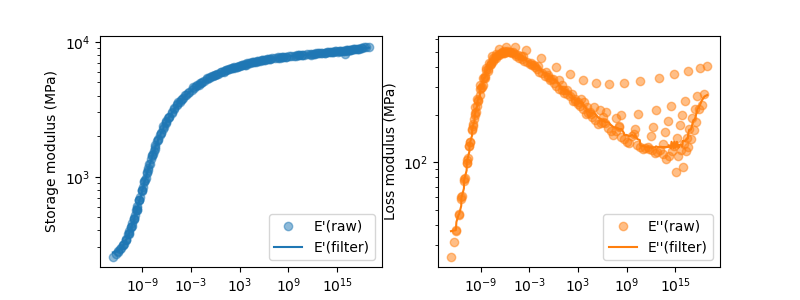

<Figure size 800x300 with 2 Axes>

In [13]:
smooth_master=master.smooth(df_master,10)
master.plot_smooth(smooth_master,units)

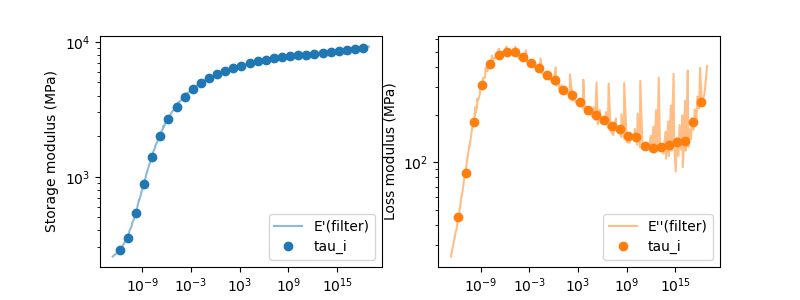

<Figure size 800x300 with 2 Axes>

In [15]:
df_dis=prony.discretize(smooth_master,window="round",nprony=0)

prony.plot_dis(smooth_master,df_dis,units)

Prony series N = 31: Convergence criterion reached!
{'E_0': 9041.188576, 'df_terms':            tau_i   alpha_i          E_0         E_i
1   7.549831e-20  0.011107  9041.188576  100.424563
2   7.035963e-19  0.019894  9041.188576  179.869395
3   6.984577e-18  0.026596  9041.188576  240.457632
4   3.260361e-16  0.011837  9041.188576  107.017229
5   6.978924e-16  0.008151  9041.188576   73.697950
6   6.978873e-15  0.011454  9041.188576  103.556753
7   6.978868e-14  0.018481  9041.188576  167.087187
8   6.981795e-13  0.001182  9041.188576   10.687145
9   6.978867e-12  0.022391  9041.188576  202.443792
10  6.979595e-11  0.004897  9041.188576   44.270440
11  6.979568e-10  0.020179  9041.188576  182.438037
12  8.797394e-09  0.015629  9041.188576  141.306869
13  8.150879e-08  0.019960  9041.188576  180.464638
14  9.976642e-07  0.026418  9041.188576  238.850017
15  1.214966e-05  0.028071  9041.188576  253.793977
16  9.999996e-05  0.029000  9041.188576  262.194520
17  1.000015e-03  0.032308  904

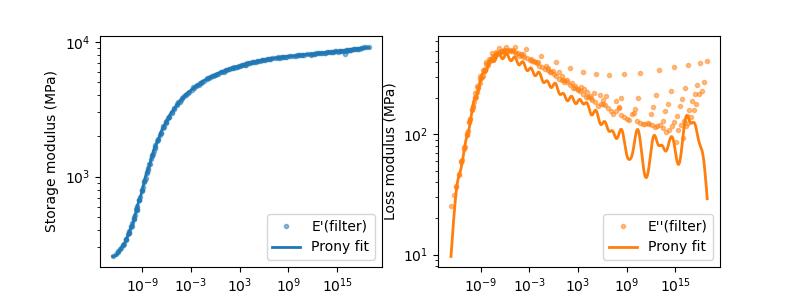

In [23]:
#0df_dis.domain="freq"
#df_dis.modul="E"
prony_series,df_GMaxw=prony.fit(df_dis,df_master,opt=True)
print(prony_series)
prony.plot_fit(df_master,df_GMaxw,units)
prony_ser=list(prony_series.values())


In [39]:
df_prony=pd.DataFrame(prony_series.values())
print(df_prony.columns)
prony_reihe=df_prony.iloc[1,0]
tau_i=prony_reihe.tau_i
alpha_i=prony_reihe.alpha_i
E0=prony_reihe.E_0.iloc[0]
Ei=prony_reihe.E_i

RangeIndex(start=0, stop=1, step=1)


In [41]:
pr=0.40
G0=E0/(2*(1+pr)) #MPa
K=E0/3*(1-2*pr) #MPa


In [42]:
import numpy as np
from scipy.optimize import minimize

def calculate_prony_series(tau_i, alpha_i, E_0, E_inf, bulk_modulus, long_term_poisson, omega, opt=False):
    """
    Calculate Prony series parameters based on ABAQUS-like formulation.

    Parameters
    ----------
    tau_i : array
        Relaxation times (time constants).
    alpha_i : array
        Prony series coefficients.
    E_0 : float
        Instantaneous modulus.
    E_inf : float
        Equilibrium modulus.
    bulk_modulus : float
        Bulk modulus.
    long_term_poisson : float
        Long-term Poisson's ratio.
    omega : array
        Angular frequency values.
    opt : bool, default = False
        Flag indicating whether optimization should be performed.

    Returns
    -------
    prony : dict
        Contains the Prony series parameters.

    """
    if opt:
        # Your optimization logic here if needed
        pass
    
    # Calculate Prony series parameters
    rel_mod = alpha_i * E_inf
    G_inf = E_inf / (2 * (1 + long_term_poisson))
    bulk_rel = bulk_modulus - 4/3 * G_inf
    omega_i = 1 / tau_i
    G_i = (3 * (1 - alpha_i) * G_inf) / (2 * (1 + long_term_poisson))
    
    prony = {
        'E_0': E_0,
        'bulk_modulus': bulk_modulus,
        'long_term_poisson': long_term_poisson,
        'tau_i': tau_i,
        'alpha_i': alpha_i,
        'G_i': G_i,
        'G_inf': G_inf,
        'bulk_rel': bulk_rel,
        'omega_i': omega_i
    }
    
    return prony

# Example usage:
tau_i = np.array([0.1, 1.0, 10.0])  # Example relaxation times
alpha_i = np.array([0.1, 0.3, 0.2])  # Example Prony coefficients
E_0 = 1000.0  # Example instantaneous modulus
E_inf = 500.0  # Example equilibrium modulus
bulk_modulus = 2000.0  # Example bulk modulus
long_term_poisson = 0.3  # Example long-term Poisson's ratio
omega = np.linspace(0.1, 10, 100)  # Example angular frequency values

prony_parameters = calculate_prony_series(tau_i, alpha_i, E_0, E_inf, bulk_modulus, long_term_poisson, omega)
print(prony_parameters)


{'E_0': 1000.0, 'bulk_modulus': 2000.0, 'long_term_poisson': 0.3, 'tau_i': array([ 0.1,  1. , 10. ]), 'alpha_i': array([0.1, 0.3, 0.2]), 'G_i': array([199.70414201, 155.32544379, 177.5147929 ]), 'G_inf': 192.3076923076923, 'bulk_rel': 1743.5897435897436, 'omega_i': array([10. ,  1. ,  0.1])}


In [ ]:
import numpy as np
from scipy.optimize import minimize

def fit_prony_series_to_experimental_data(omega, storage_modulus, loss_modulus, tau_i_guess, alpha_i_guess, E_0_guess, E_inf_guess, bulk_modulus_guess, long_term_poisson_guess):
    """
    Fit Prony series parameters to experimental storage and loss moduli data.

    Parameters
    ----------
    omega : array
        Angular frequency values.
    storage_modulus : array
        Experimental storage modulus data.
    loss_modulus : array
        Experimental loss modulus data.
    tau_i_guess : array
        Initial guess for relaxation times (time constants).
    alpha_i_guess : array
        Initial guess for Prony series coefficients.
    E_0_guess : float
        Initial guess for instantaneous modulus.
    E_inf_guess : float
        Initial guess for equilibrium modulus.
    bulk_modulus_guess : float
        Initial guess for bulk modulus.
    long_term_poisson_guess : float
        Initial guess for long-term Poisson's ratio.

    Returns
    -------
    prony : dict
        Contains the Prony series parameters that best fit the experimental data.

    """
    def ls_res(params):
        alpha_i, tau_i, E_0, E_inf, bulk_modulus, long_term_poisson = params
        
        # Calculate Prony series parameters
        rel_mod = alpha_i * E_inf
        G_inf = E_inf / (2 * (1 + long_term_poisson))
        bulk_rel = bulk_modulus - 4/3 * G_inf
        omega_i = 1 / tau_i
        G_i = (3 * (1 - alpha_i) * G_inf) / (2 * (1 + long_term_poisson))
        
        # Calculate storage and loss moduli from Prony series
        storage_modulus_fit = E_0 + sum([G_i[i] * (1 - np.exp(-omega_i[i] * omega)) for i in range(len(tau_i))])
        loss_modulus_fit = E_inf + sum([G_i[i] * (np.exp(-omega_i[i] * omega) - 1) for i in range(len(tau_i))])
        
        # Calculate the sum of squared differences between experimental and fitted moduli
        ssd_storage = sum((storage_modulus - storage_modulus_fit) ** 2)
        ssd_loss = sum((loss_modulus - loss_modulus_fit) ** 2)
        
        return ssd_storage + ssd_loss

    initial_params = (alpha_i_guess, tau_i_guess, E_0_guess, E_inf_guess, bulk_modulus_guess, long_term_poisson_guess)

    # Perform the least-squares minimization to obtain the best-fitting Prony series parameters
    res = minimize(ls_res, initial_params, method='L-BFGS-B', bounds=[(0, 1)] * len(alpha_i_guess) + [(0, None)] * len(tau_i_guess) + [(0, None)] * 4)

    # Extract the best-fitting parameters
    best_params = res.x
    alpha_i_best, tau_i_best, E_0_best, E_inf_best, bulk_modulus_best, long_term_poisson_best = best_params
    
    # Calculate the other Prony series parameters
    rel_mod_best = alpha_i_best * E_inf_best
    G_inf_best = E_inf_best / (2 * (1 + long_term_poisson_best))
    omega_i_best = 1 / tau_i_best
    G_i_best = (3 * (1 - alpha_i_best) * G_inf_best) / (2 * (1 + long_term_poisson_best))

    prony = {
        'alpha_i': alpha_i_best,
        'tau_i': tau_i_best,
        'E_0': E_0_best,
        'E_inf': E_inf_best,
        'bulk_modulus': bulk_modulus_best,
        'long_term_poisson': long_term_poisson_best,
        'rel_mod': rel_mod_best,
        'G_inf': G_inf_best,
        'G_i': G_i_best,
        'omega_i': omega_i_best
    }

    return prony

# Example usage:
omega = np.linspace(0.1, 10, 100)  # Example angular frequency values
storage_modulus = np.array(...)  # Replace with your experimental storage modulus data
loss_modulus = np.array(...)  # Replace with your experimental loss modulus data

tau_i_guess = np.array([0.1, 1.0, 10.0])  # Initial guess for relaxation times
alpha_i_guess = np.array([0.1, 0.3, 0.2])  # Initial guess for Prony coefficients
E_0_guess = 1000.0  # Initial guess for instantaneous modulus
E_inf_guess = 500.0  # Initial guess for equilibrium modulus
bulk_modulus_guess = 2000.0  # Initial guess for bulk modulus
long_term_poisson_guess = 0.3  # Initial guess for long-term Poisson's ratio

prony_parameters = fit_prony_series_to_experimental_data(omega, storage_modulus, loss_modulus, tau_i_guess, alpha_i_guess, E_0_guess, E_inf_guess, bulk_modulus_guess, long_term_poisson_guess)
print(prony_parameters)


In [43]:
omega=df_master['omega'].values
tau_i=df_dis['tau_i']